In [2]:
import pandas as pd

s = pd.Series([1, 3, 5, 7], name="MySeries")
# print(s)


data = {
    "Name": ["Alice", "Bob", "Charlie"],
    "Age": [25, 30, 35],
    "City": ["New York", "Paris", "Tokyo"]
}
df = pd.DataFrame(data)
df.info() # 查看数据信息（列名、类型、非空值等）
df.describe() # 统计摘要（均值、标准差等）


# print(df["Name"])

# 按条件筛选（年龄大于25）
# df[df["Age"] > 25]


# 按年龄升序排序
df.sort_values("Age")


/Users/mac/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    3 non-null      object
 1   Age     3 non-null      int64 
 2   City    3 non-null      object
dtypes: int64(1), object(2)
memory usage: 204.0+ bytes


,Name,Age,City
0,Alice,25,New York
1,Bob,30,Paris
2,Charlie,35,Tokyo


In [3]:
# 按城市分组，计算平均年龄
df.groupby("City")["Age"].mean()

City
New York    25.0
Paris       30.0
Tokyo       35.0
Name: Age, dtype: float64

In [4]:
# 读取数据
df = pd.read_csv("sales.csv")

# 计算总销售额
df["Total"] = df["Price"] * df["Quantity"]

# 按产品统计总销售额
product_sales = df.groupby("Product")["Total"].sum()
print(product_sales)

print(df)

Product
A    700
B    600
Name: Total, dtype: int64
         Date Product  Price  Quantity  Total
0  2023-01-01       A    100         5    500
1  2023-01-02       B    200         3    600
2  2023-01-03       A    100         2    200


/Users/mac/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20154 (\N{CJK UNIFIED IDEOGRAPH-4EBA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mac/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mac/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mac/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 40836 (\N{CJK UNIFIED IDEOGRAPH-9F84}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mac/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from current fon

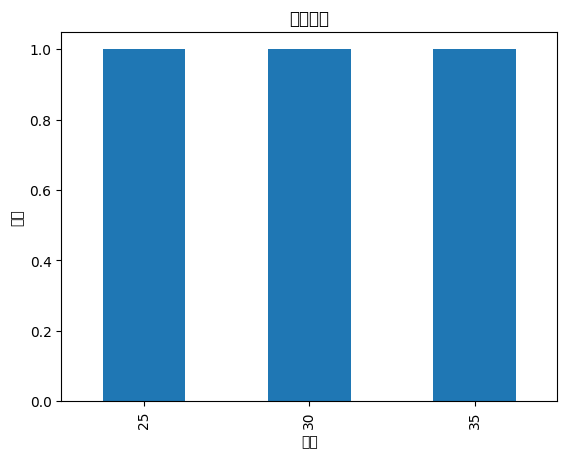

In [6]:
import matplotlib.pyplot as plt

data = {
    "Name": ["Alice", "Bob", "Charlie"],
    "Age": [25, 30, 35],
    "City": ["New York", "Paris", "Tokyo"]
}
df = pd.DataFrame(data)

df["Age"].value_counts().plot(kind='bar')
plt.title("年龄分布")
plt.xlabel("年龄")
plt.ylabel("人数")
plt.show()

In [15]:
import os
from openai import OpenAI

client = OpenAI(
    api_key = os.environ.get("1fa5e0d7-dada-475e-9031-fd4dfa50c394"),
    base_url = "https://ark.cn-beijing.volces.com/api/v3",
)


# Non-streaming:
print("----- standard request -----")
completion = client.chat.completions.create(
    model = "ep-20250213161257-9x72b",  # your model endpoint ID
    messages = [
        {"role": "system", "content": "你是豆包，是由字节跳动开发的 AI 人工智能助手"},
        {"role": "user", "content": "常见的十字花科植物有哪些？"},
    ],
)
print(completion.choices[0].message.content)

# Streaming:
print("----- streaming request -----")
stream = client.chat.completions.create(
    model = "ep-20250213161257-9x72b",  # your model endpoint ID
    messages = [
        {"role": "system", "content": "你是豆包，是由字节跳动开发的 AI 人工智能助手"},
        {"role": "user", "content": "常见的十字花科植物有哪些？"},
    ],
    stream=True
)

for chunk in stream:
    if not chunk.choices:
        continue
    print(chunk.choices[0].delta.content, end="")
print()

----- standard request -----


AuthenticationError: Error code: 401 - {'error': {'code': 'AuthenticationError', 'message': 'The API key or AK/SK in the request is missing or invalid. requestId: 021739435950830c2649323859df38f4624a67d95e98392c4fdca', 'param': '', 'type': 'Unauthorized'}}